In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from wordcloud import WordCloud

In [143]:
## Importing the data 

data = pd.read_csv("/Users/snigdhacheekoty/Documents/GitHub/SpamDetector/spam.csv", encoding = "latin-1") 
## If we use the defauot encoding, it gives an error because there are few invalid characters in the file 
# Invalid characters like: emojis and non standard symbols


In [144]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [145]:
## Dropping the unnamed columns 2, 3,4

data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
data.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [146]:
## renaming columns 

data.columns = ["labels", "data"]
data.head(6)

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [147]:
# Create a column: binary labels
# Representing the lables numerically: Always better to do this!
data["binary_labels"] = data["labels"].map({"spam": 1, "ham":0})

# creating y matrix( or y vector)
y = data["binary_labels"] 

In [148]:
data.head(10)

,labels,data,binary_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [149]:
# We have to create the X matrix 
# Firstly, trying CountVectorize() 


count_vectorizer = CountVectorizer(decode_error = "ignore") 
X = count_vectorizer.fit_transform(data["data"])
# if any UTF-8 characters are found , we want to ignore them

In [150]:
# Secondly, let's try Tfidf vectorizer

tfidf_vectorizer = TfidfVectorizer(decode_error= 'ignore')
X_tf = tfidf_vectorizer.fit_transform(data["data"])



In [151]:
print(X)

  (0, 3550)	1
  (0, 8030)	1
  (0, 4350)	1
  (0, 5920)	1
  (0, 2327)	1
  (0, 1303)	1
  (0, 5537)	1
  (0, 4087)	1
  (0, 1751)	1
  (0, 3634)	1
  (0, 8489)	1
  (0, 4476)	1
  (0, 1749)	1
  (0, 2048)	1
  (0, 7645)	1
  (0, 3594)	1
  (0, 1069)	1
  (0, 8267)	1
  (1, 5504)	1
  (1, 4512)	1
  (1, 4318)	1
  (1, 8392)	1
  (1, 5533)	1
  (2, 4087)	1
  (2, 3358)	1
  :	:
  (5570, 4218)	1
  (5570, 8313)	1
  (5570, 1084)	1
  (5570, 4615)	1
  (5570, 7039)	1
  (5570, 3308)	1
  (5570, 7627)	1
  (5570, 1438)	1
  (5570, 5334)	1
  (5570, 2592)	1
  (5570, 8065)	1
  (5570, 1778)	1
  (5570, 7049)	1
  (5570, 2892)	1
  (5570, 3470)	1
  (5570, 1786)	1
  (5570, 3687)	1
  (5570, 4161)	1
  (5570, 903)	1
  (5570, 1546)	1
  (5571, 7756)	1
  (5571, 5244)	1
  (5571, 4225)	2
  (5571, 7885)	1
  (5571, 6505)	1


In [152]:
print(X_tf)

  (0, 8267)	0.18238655630689804
  (0, 1069)	0.3264252905795869
  (0, 3594)	0.15318864840197105
  (0, 7645)	0.15566431601878158
  (0, 2048)	0.2757654045621182
  (0, 1749)	0.3116082237740733
  (0, 4476)	0.2757654045621182
  (0, 8489)	0.22080132794235655
  (0, 3634)	0.1803175103691124
  (0, 1751)	0.2757654045621182
  (0, 4087)	0.10720385321563428
  (0, 5537)	0.15618023117358304
  (0, 1303)	0.24415547176756056
  (0, 2327)	0.25279391746019725
  (0, 5920)	0.2553151503985779
  (0, 4350)	0.3264252905795869
  (0, 8030)	0.22998520738984352
  (0, 3550)	0.1481298737377147
  (1, 5533)	0.5465881710238072
  (1, 8392)	0.4316010362639011
  (1, 4318)	0.5236458071582338
  (1, 4512)	0.4082988561907181
  (1, 5504)	0.27211951321382544
  (2, 77)	0.23012628226525952
  (2, 1156)	0.16541257593676326
  :	:
  (5570, 1786)	0.2829205787072918
  (5570, 3470)	0.2752778321471703
  (5570, 2892)	0.24400995680638932
  (5570, 7049)	0.20534386872930602
  (5570, 1778)	0.1366456751602606
  (5570, 8065)	0.20880862098597563
  

In [153]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # for count_vectorizer

# X_train, X_test, y_train, y_test = train_test_split(X_tf,y, test_size = 0.3) # for tfidf_vectorizer

# Mutlinomial Naive Bayes Classification

In [154]:
# Training Multinomial Naive Bayes model 

model_mnb = MultinomialNB()
model_mnb.fit(X_train, y_train)
print("Training score (using count Vectorizer): ", model_mnb.score(X_train, y_train)) 
print("Test score: (using count Vectorizer)", model_mnb.score(X_test, y_test))

Training score (using count Vectorizer):  0.9951282051282051
Test score: (using count Vectorizer) 0.9820574162679426


In [155]:
# Now training the model with on the data created by TFIDF

# splitting the data 
X_tf_train, X_tf_test, y_train, y_test  = train_test_split(X_tf, y , test_size = 0.3)



In [156]:
# training the model: Multinomial Naive Bayes 

model_mnb = MultinomialNB() # model constructor
model_mnb.fit(X_tf_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [157]:
print("Training Score: (using TFIDF Vectorizer)", model_mnb.score(X_tf_train, y_train))
print("Test Score (using TFIDF Vectorizer)", model_mnb.score(X_tf_test, y_test))


Training Score: (using TFIDF Vectorizer) 0.9674358974358974
Test Score (using TFIDF Vectorizer) 0.9593301435406698


# AdaBoost Classification

In [158]:
# Training the model
# With Count vectorized data
model_ab = AdaBoostClassifier()
model_ab.fit(X_train, y_train)
print("Training Score: (using Count Vectorizer)", model_ab.score(X_train, y_train))
print("Test Score (using Count Vectorizer):", model_ab.score(X_test, y_test))

Training Score: (using Count Vectorizer) 0.8684615384615385
Test Score (using Count Vectorizer): 0.8624401913875598


In [159]:
# With TFIDF vectorized data

model_ab = AdaBoostClassifier()
model_ab.fit(X_tf_train,y_train)
print("Training Score: (using TFIDF Vectorizer)", model_ab.score(X_tf_train, y_train))
print("Test Score (using TFIDF Vectorizer)", model_ab.score(X_tf_test, y_test))

Training Score: (using TFIDF Vectorizer) 0.9817948717948718
Test Score (using TFIDF Vectorizer) 0.9748803827751196


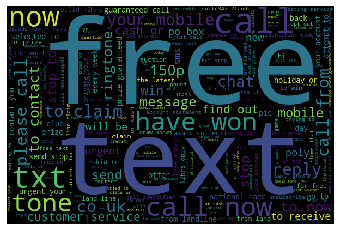

In [161]:
## Visualize the data
# Seeing the most common words in the messages

def visualize(label):
    words = ''
    for msg in data[data["labels"]== label]["data"]:  # This helps print spam and ham message words separately
        msg = msg.lower()
        words += msg + ' '  # Concatenating the words to the string 
        #.... wordcloud needs a string of words as the input
    wordcloud = WordCloud(width = 600, height = 400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

    
visualize('spam')


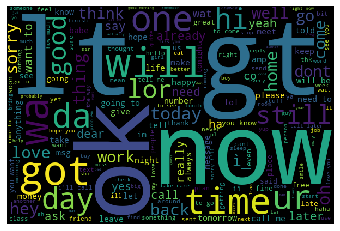

In [162]:
visualize('ham')

In [170]:
## See what we're getting wrong

data["predictions"] = model_ab.predict(X_tf)

# Messages that should be SPAM (But were predicted incorrectly as ham by our classifier)
# Because, even though our AdaBoost Classifier has an test accuracy of 97%, there were few incorrect predictions made

sneaky_spam = data[(data["predictions"] == 0) & (data["binary_labels"] == 1)]["data"]
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+
SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu
100 dating service cal;l 09064012103 box334sk38ch
You will recieve your tone within the next 24hrs. For Terms and conditions please see Channel U Teletext Pg 750
XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIALE ZOUK WITH NICHOLS FROM PARIS.FREE ROSES 2 ALL LADIES !!! info: 07946746291/07880867867 
Todays Vodafone numbers ending with 48

In [171]:
## On the contrary, let's now see what messages were predicted incorrectly as spam 
# .... Where they were supposed to be HAM messages

sneaky_spam2 = data[(data["predictions"] == 1) & (data["binary_labels"]== 0)]["data"]

for msg in sneaky_spam2:
    print(msg)

It will stop on itself. I however suggest she stays with someone that will be able to give ors for every stool.
Hi the way I was with u 2day, is the normal way&this is the real me. UR unique&I hope I know u 4 the rest of mylife. Hope u find wot was lost.
Yes:)from last week itself i'm taking live call.
Hi hope u get this txt~journey hasnt been gd,now about 50 mins late I think.
1.20 that call cost. Which i guess isnt bad. Miss ya, need ya, want ya, love ya
You should know now. So how's anthony. Are you bringing money. I've school fees to pay and rent and stuff like that. Thats why i need your help. A friend in need....|
Macha dont feel upset.i can assume your mindset.believe me one evening with me and i have some wonderful plans for both of us.LET LIFE BEGIN AGAIN.call me anytime
Hey i booked the kb on sat already... what other lessons are we going for ah? Keep your sat night free we need to meet and confirm our lodging 
I love u 2 babe! R u sure everything is alrite. Is he being an id